In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import igraph
import importlib
import methods
import uuid

In [26]:
def build_community_graph(n_coms, n_com_nodes=10, intra_com_p=0.6, inter_com_p=0.05):
    coms = [[str(uuid.uuid4()) for _ in range(n_com_nodes)] for _ in range(n_coms)]
    edges = []
    offset = 0
    offsets = [0 for _ in range(len(coms))]
    for k, c in enumerate(coms):
        offsets[k] = offset
        for i, n1 in enumerate(c):
            for j, n2 in enumerate(c):
                if i != j and np.random.uniform() <= intra_com_p:
                    edges.append((offset + i, offset + j))
        offset += len(c)
    
    for i, c1 in enumerate(coms):
        for j, c2 in enumerate(coms):
            if i != j:
                for k, n1 in enumerate(c1):
                    for l, n2 in enumerate(c2):
                        if np.random.uniform() <= inter_com_p:
                            edges.append((offsets[i] + k, offsets[j] + l))
    
    result = igraph.Graph(edges=edges, directed=False).simplify(multiple=True, loops=False)
    result.vs['name'] = sum(coms, [])
    return result

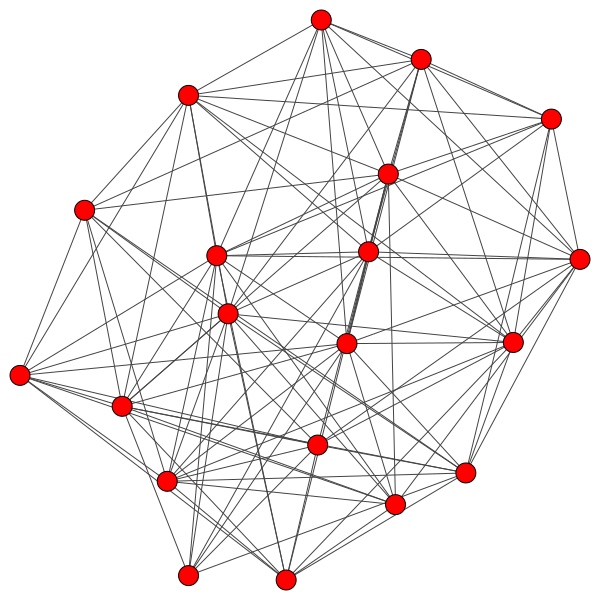

In [27]:
graph = build_community_graph(2, intra_com_p=0.6, inter_com_p=0.18)
igraph.plot(graph)

## Spectral Partitioning

In [28]:
laplacian = np.zeros(shape=(len(graph.vs), len(graph.vs)))
for v in graph.vs:
    for n in v.neighbors():
        laplacian[v.index][n.index] = -1
    laplacian[v.index][v.index] = v.degree()

In [123]:
laplacian[:10,:10]

array([[ 10.,  -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.],
       [ -1.,   9.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.],
       [ -1.,  -1.,  11.,  -1.,  -1.,  -1.,  -1.,   0.,   0.,  -1.],
       [ -1.,  -1.,  -1.,   9.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.],
       [ -1.,  -1.,  -1.,  -1.,  13.,  -1.,  -1.,  -1.,  -1.,  -1.],
       [ -1.,   0.,  -1.,  -1.,  -1.,  12.,   0.,  -1.,  -1.,  -1.],
       [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  13.,  -1.,  -1.,  -1.],
       [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  11.,  -1.,  -1.],
       [ -1.,  -1.,   0.,   0.,  -1.,  -1.,  -1.,  -1.,  13.,  -1.],
       [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  13.]])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


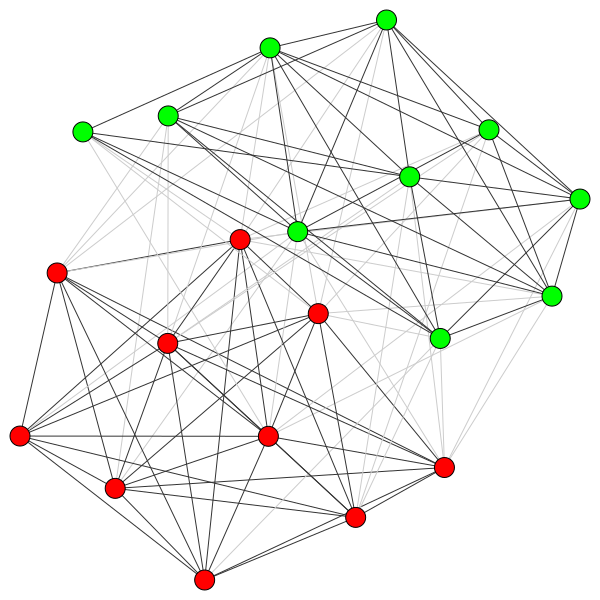

In [81]:
vals, vecs = np.linalg.eigh(laplacian)

membership = [int(v >= 0) for v in vecs[:, list(vals).index(sorted(vals)[1])]]
clust = igraph.VertexClustering(graph, membership=membership)

print(clust.membership)
igraph.plot(clust)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


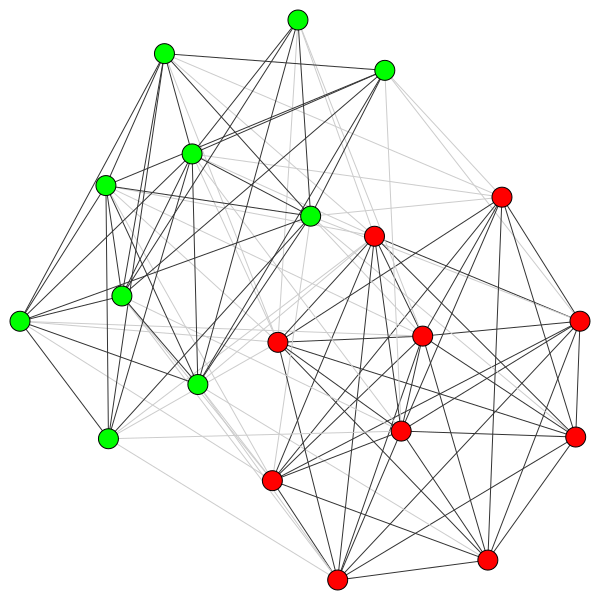

In [46]:
clust = graph.community_optimal_modularity()

print(clust.membership)
igraph.plot(clust)

[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]


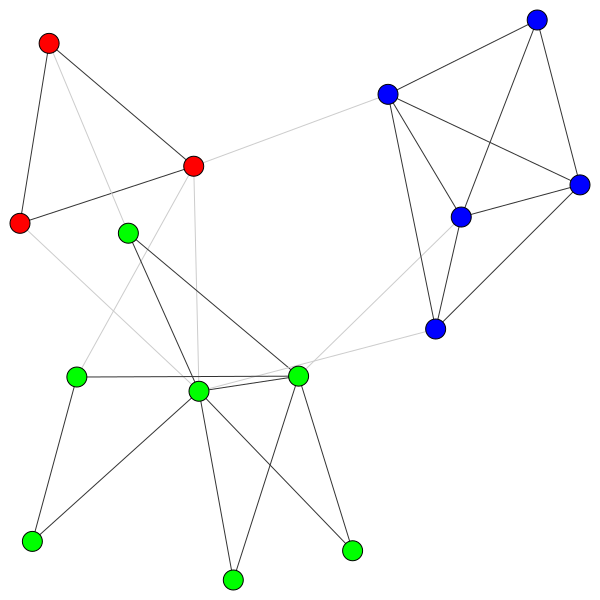

In [73]:
graph_2 = build_community_graph(3, n_com_nodes=5, intra_com_p=0.25, inter_com_p=0.1)

clust = graph_2.community_optimal_modularity()

print(clust.membership)
igraph.plot(clust)

## Edge Betweenness

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


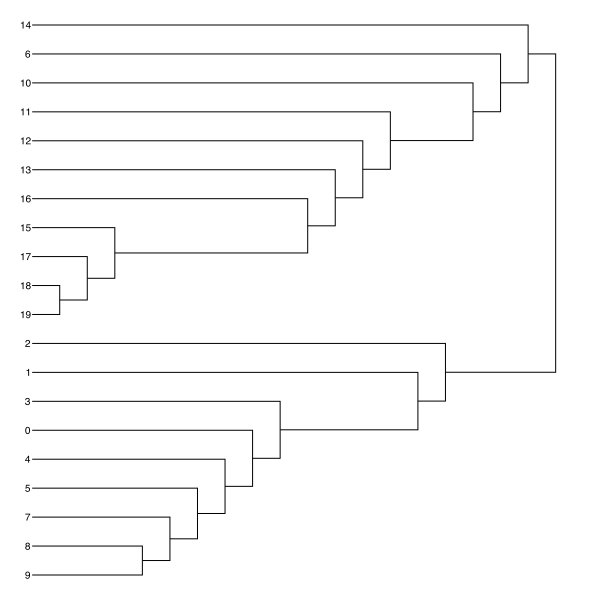

In [118]:
dend = graph.community_edge_betweenness()
clust = dend.as_clustering()

print(clust.membership)
igraph.plot(dend)

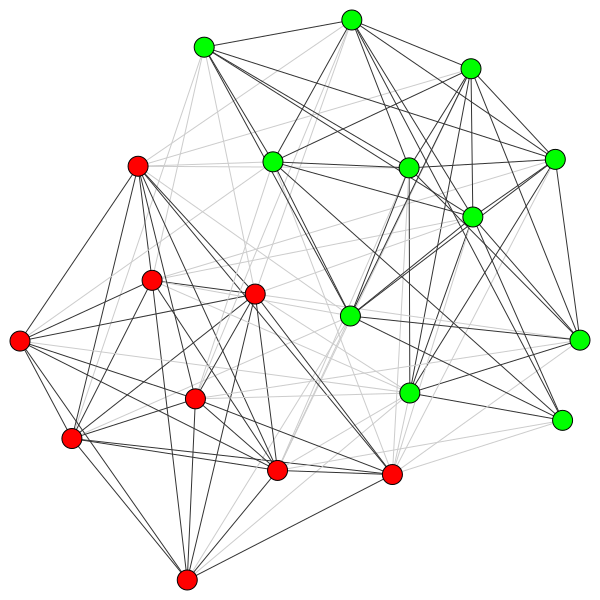

In [119]:
igraph.plot(clust)

## Walktrap

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


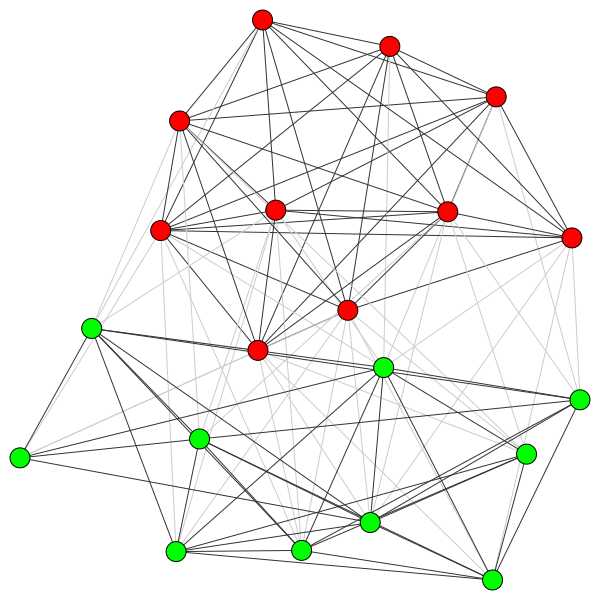

In [82]:
dend = graph.community_walktrap()
clust = dend.as_clustering()

print(clust.membership)
igraph.plot(clust)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3]


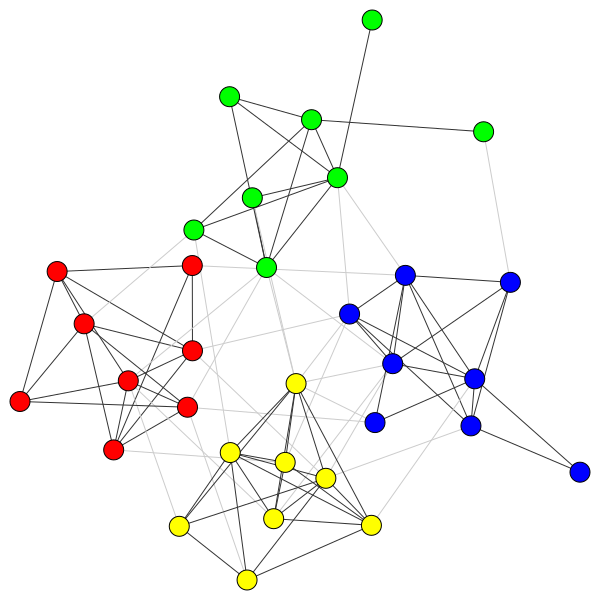

In [116]:
graph_3 = build_community_graph(4, n_com_nodes=8, intra_com_p=0.35, inter_com_p=0.04)

dend = graph_3.community_walktrap()
clust = dend.as_clustering()

print(clust.membership)
igraph.plot(clust)

## Walktrap Simulated Demo

In [242]:
graph_5 = build_community_graph(2, n_com_nodes=6, intra_com_p=0.75, inter_com_p=0.1)

In [243]:
graph_5.vs["label"] = list(range(12))
walks = methods._walktrap_run_k_walks(graph_5, 4, 100)

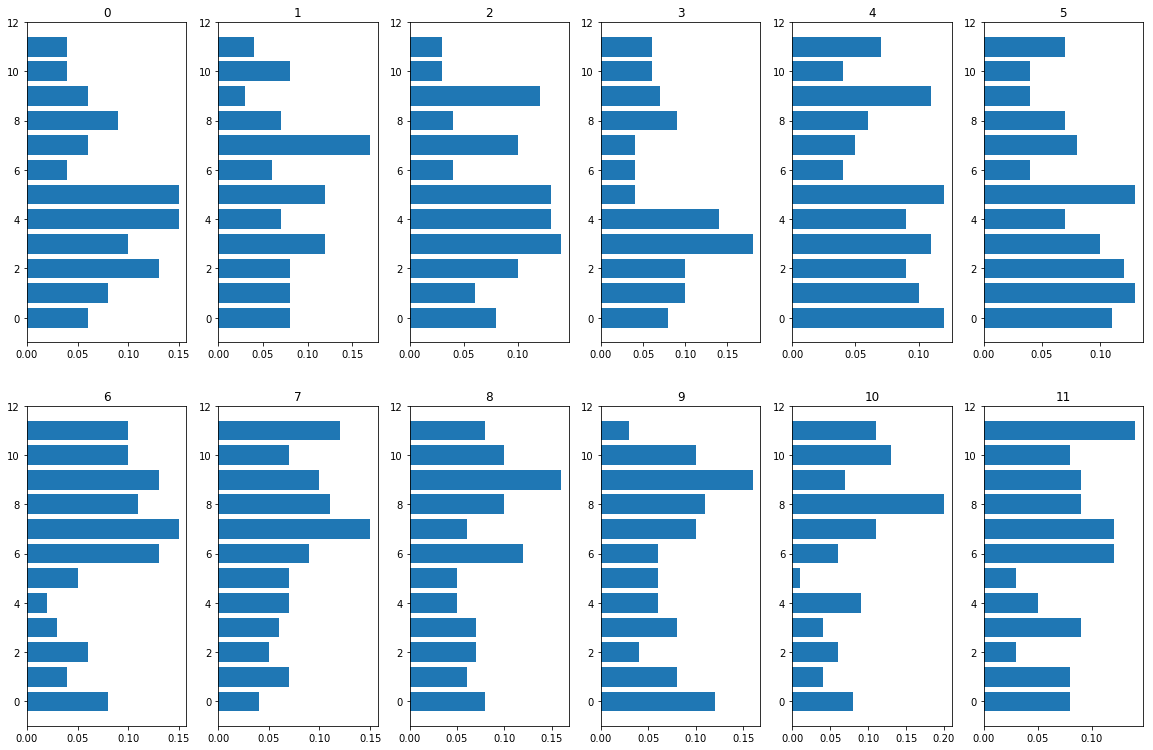

In [244]:
plt.figure(figsize=(20,20))
for i in range(12):
    ax = plt.subplot(3, 6, i+1)
    ax.barh(list(range(len(walks))), walks[i])
    plt.title(i)
plt.show()

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]


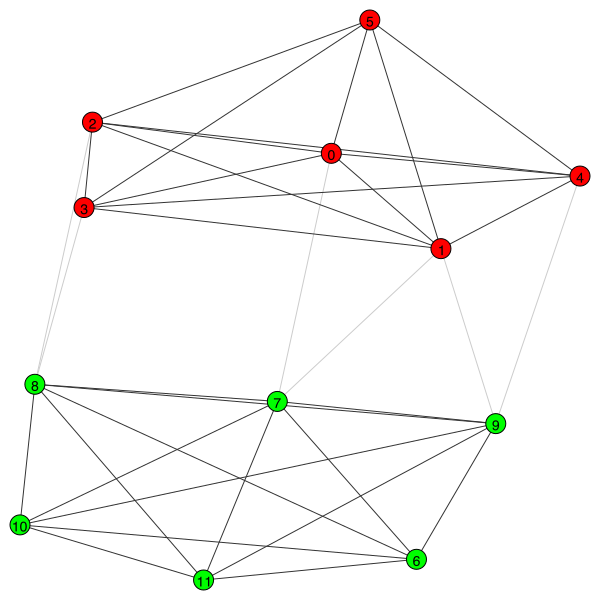

In [274]:
dend = graph_5.community_walktrap()
clust = dend.as_clustering()

print(clust.membership)
igraph.plot(clust)